In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Getting Image
img = cv2.imread("DATA//00-puppy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [12]:
# Converting to HSV
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Converting to HLS
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

#plt.imshow(img)

In [18]:
# Blending Images
img = cv2.imread("DATA//dog_backpack.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA//watermark_no_copy.png") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 

# note that the images are not the same size!
img.shape
img2.shape

(1280, 1277, 3)

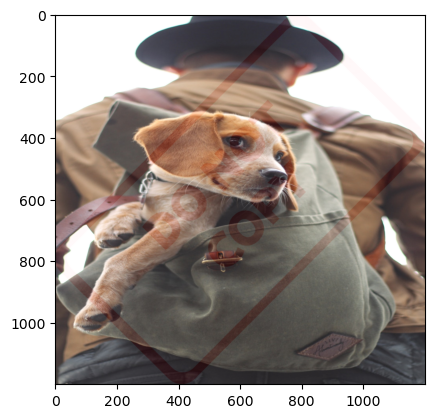

In [35]:
# Blending images of the same size
img = cv2.resize(img, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

blended = cv2.addWeighted(src1=img, alpha=1, src2=img2, beta=0.1, gamma=0) 
# alpha, beta and gamma are constants <1 that computes the value of the new pixel for the new image.
# new_pixel = alpha* pixel from source1) + beta*(pixel from source2) + gamma
plt.imshow(blended)

In [41]:
# Overlaying images
img = cv2.imread("DATA//dog_backpack.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA//watermark_no_copy.png") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 

largeImage = img
smallImage = cv2.resize(img2, (600,600))

x_offset = 0
y_offset = 0

x_end = x_offset+smallImage.shape[1] # numpy thinks that the vertical axis as the x axis.
y_end = y_offset+smallImage.shape[0] # the horizontal axis is the y axis.

largeImage[y_offset:y_end, x_offset:x_end] = smallImage # laying the small image on top of the larger image - "replacing the pixels in the numpy array"

# plt.imshow(largeImage)

# This leads to blending with images of different sizes as well as masking.

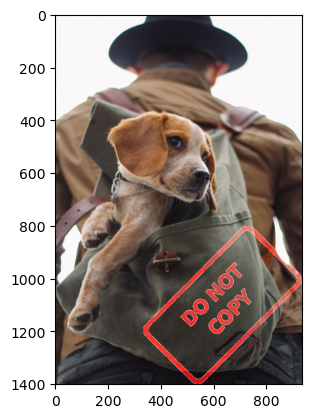

In [110]:
# Masking Images
img1 = cv2.imread("DATA//dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA//watermark_no_copy.png") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 

img2 = cv2.resize(img2, (600,600))

# Region of Interest (ROI) (Bottom right corner)
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0] 

roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]

# Creating a Mask
mask = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(mask) # inverse colors
# plt.imshow(mask_inv, cmap="gray")

# cv2 will remove all other color channels - this means we need to add them back to make it compatible with other functions!

# Convert Mask to have 3 channels
white_background = np.full(img2.shape, 255, dtype=np.uint8) # create a white background with the same size of shape of the mask.

# converting inverse mask to have 3 color channels
background = cv2.bitwise_or(white_background, white_background, mask=mask_inv) 
#plt.imshow(background)

# apply the color of the original to the mask
foreground = cv2.bitwise_or(img2, img2, mask=mask_inv)
#plt.imshow(foreground)

final_roi = cv2.bitwise_or(roi, foreground) # merge both the foreground and the roi
#plt.imshow(final_roi)

img1[y_offset:y_offset+roi.shape[0], x_offset:x_offset+roi.shape[1]] = final_roi
plt.imshow(img1)


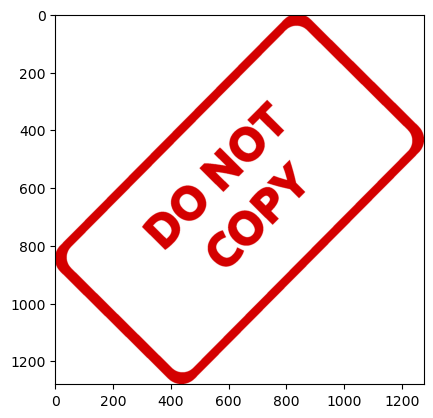

In [112]:
img1 = cv2.imread("DATA//dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA//watermark_no_copy.png") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
plt.imshow(img2)

In [5]:
######### IMAGE THRESHOLDING #########
import cv2
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread("DATA//rainbow.jpg", 0) # read the image in grayscale

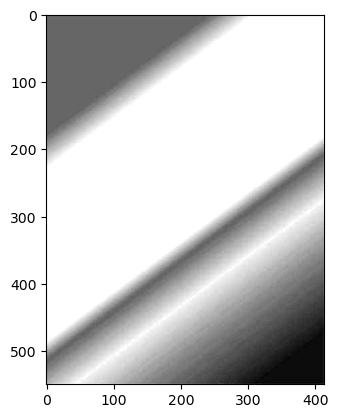

In [13]:
# ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # (img, threshold, maxvalue)  -- any value below threshold = 0, values above threshold = 255.
# ret is the threshold value.

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) # values above threshold = threshold, any values below keep their value.

plt.imshow(thresh1, cmap="gray")

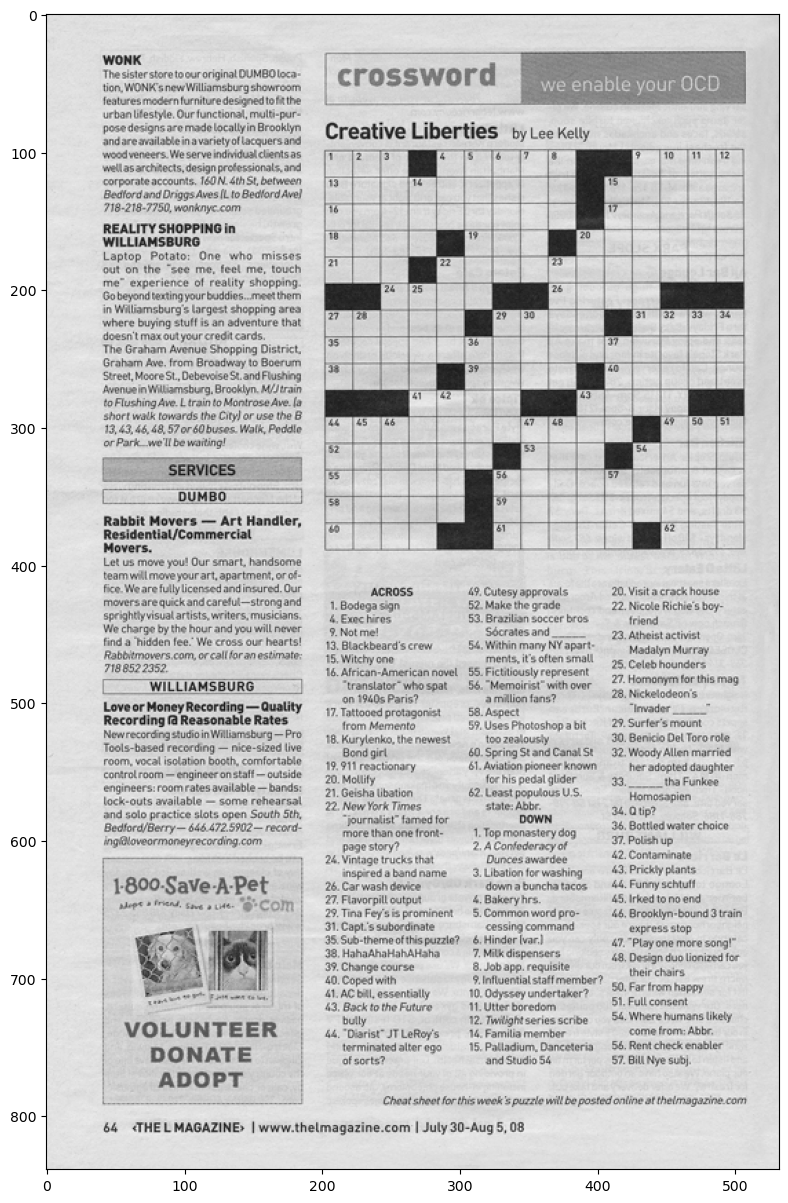

In [17]:
img = cv2.imread("DATA//crossword.jpg",0)

# showing image function
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")
    
show_pic(img)

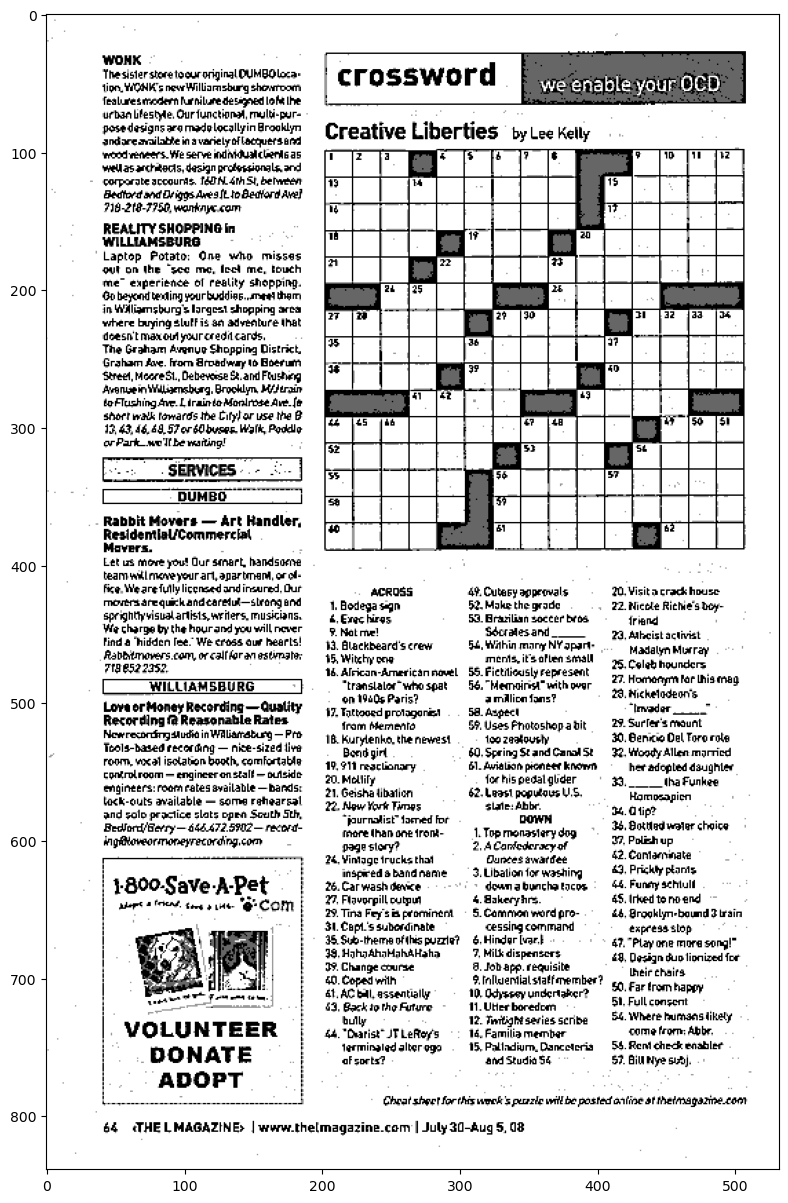

In [37]:
ret, thresh1 = cv2.threshold(img, 160, 255, cv2.THRESH_BINARY)
# quality is not very good - solution: use adaptive threshold.

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 10) # average values out then make it black and white using THRESH_BINARY.
# show_pic(th2) # looking at the neighbouring values of each pixel

blended = cv2.addWeighted(src1=thresh1, src2=th2, beta=0.4, alpha=0.6, gamma=0) # use the technique of blending to get higher quality.
show_pic(blended)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Convenient Functions

def load_img(): # load my images
    img = cv2.imread("DATA//bricks.jpg").astype(np.float32)/255 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def display_img(img): # display my images at a larger scale
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

def placingText():
    img = load_img() # load the image
    font = cv2.FONT_HERSHEY_COMPLEX # font type
    cv2.putText(img, text="bricks", org=(10,600), fontFace=font, fontScale=10, color=(255,0,0), thickness=6) # put text on the image

In [19]:
# Gamma Correction #
gamma = 3 # gamma value > 1 = darker image, gamma value < 1 = brighter image

result = np.power(img, gamma) # raise each pixel to the power of gamma
#display_img(result)

In [41]:
# Blurring #

### Manual Blur/Averaging ###
kernel = np.ones(shape=(5,5), dtype=np.float32)/25 # create a matrix (kernel) to blue image.
destination = cv2.filter2D(img, -1, kernel) # (image, desired depth, kernel) - this method applies the kernel (filter) to the image.

#display_img(destination) # observe the blur! :D 

### cv2 Built-in Blur ###
result = cv2.blur(img, ksize=(10,10)) # cv2's default blurring kernel - makes things convenient
#display_img(result) # the larger the kernel size, the blurrier the image.


placingText() # reset

### Gaussian Blur ###
result = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=30) # (image, kernel size, sigmaX) - sigmaX is the standard deviation in the x direction.

placingText() # reset

### Median Blur ### - very good for reducing noise in an image since it kept the details of the words but blurred the background image.
result = cv2.medianBlur(img, 5) # (image, kernel size)
# Getting Noise Image
noisy = cv2.imread("DATA//sammy_noise.jpg")

# Using Median Blur to fix the noise
median = cv2.medianBlur(noisy, 5)
#display_img(median)

### Bilateral Filter ###
blur = cv2.bilateralFilter(img, 9, 75, 75) 
# display_img(blur)

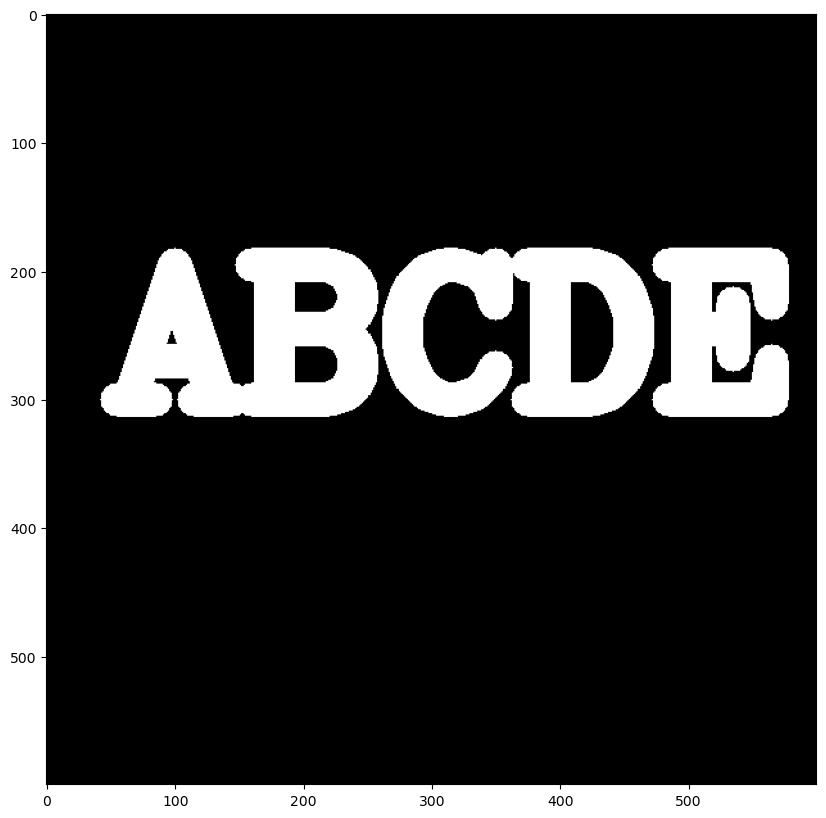

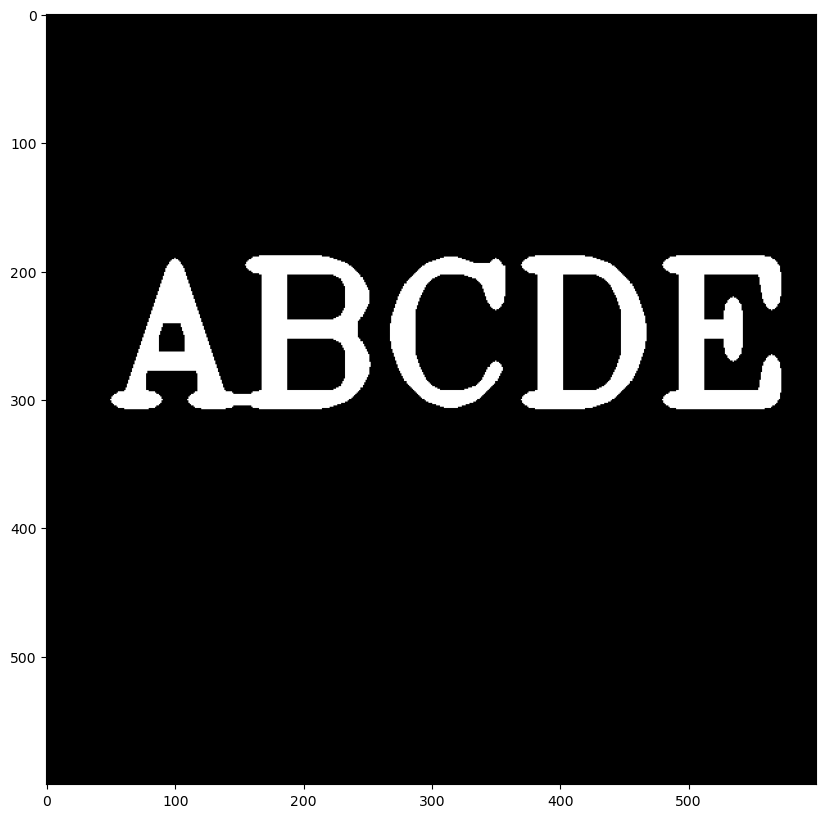

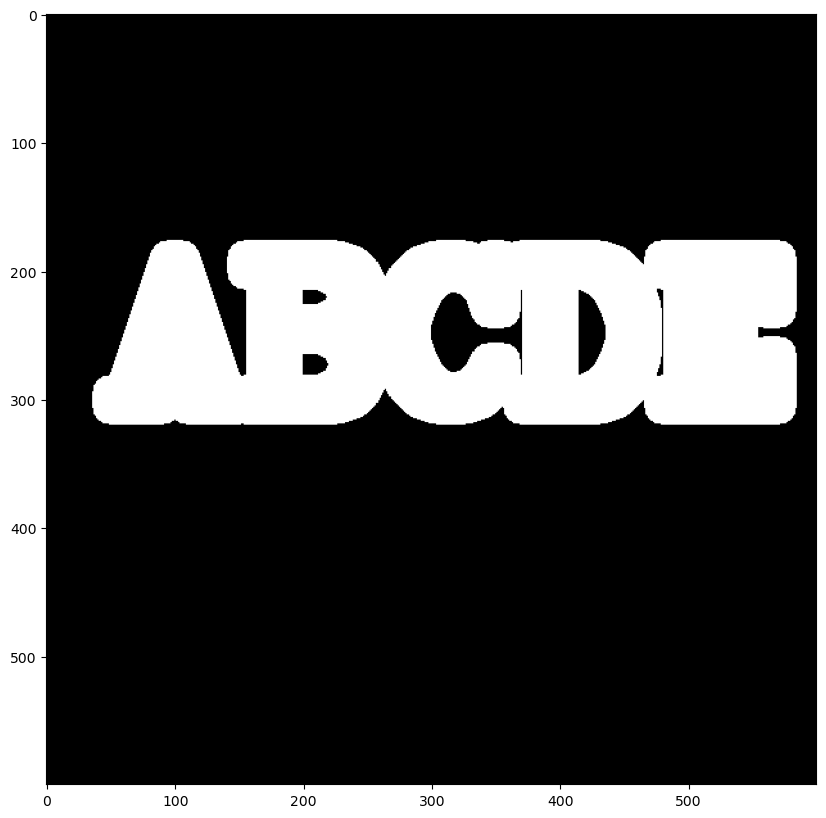

In [62]:
def load_img(): # load a new blank image
    blank_img = np.zeros(shape=(600,600))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(blank_img, text="ABCDE", org=(50,300), fontFace=font, fontScale=5, color=(255,255,255), thickness=25) # put text on the image
    return blank_img

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

## Erosion and Dilation ## - removing/adding some foreground.
kernel = np.ones(shape=(5,5), dtype=np.uint8) # create a 5x5 matrix of ones
img = load_img()
result = cv2.erode(img, kernel, iterations=3) # erode away the foreground text
result2 = cv2.dilate(img, kernel, iterations=3) # dilate the foreground text

## Opening ## 
# removing background noise.
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600)) # create a random array of 0s and 1s

white_noise = white_noise * 255 # make the array of 0s and 1s into an array of 0s and 255s
noise_img = white_noise + img # add the noise to the image
result = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel) # remove the noise from the background of the image

## Closing ##
# removing foreground noise.
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600,600)) # create a random array of 0s and 1s
black_noise *= -255 # make the array of 0s and 1s into an array of 0s and -255s 

black_noise_img = img + black_noise # add the noise to the image - when we add -255 to 255, it becomes 0.
black_noise_img[black_noise_img == -255] = 0 # make all -255 values become 0 because 0 should be the lowest value in the image. 

result = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel) # remove the noise from the foreground of the image


## Morphological Gradient ## - a method for edge detection
img = load_img()
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel) # shows the difference between the erosion and dilation of the image. 
#display_img(gradient)